In [1]:
import gzip
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [2]:
file = gzip.open('goemotions.json.gz')
json_file = json.load(file)

In [3]:
emotions = np.array([])
sentiments = np.array([])
posts = np.array([1])
json_file = np.asarray(json_file)

posts = json_file[:,0]
emotions = json_file[:,1]
sentiments = json_file[:,2]

In [ ]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
plt.hist(emotions, bins=range(29), align="left", ec="white")
plt.xticks(rotation=45, ha="right")
plt.ylabel("number of posts")
plt.title("Distribution of the Emotion Label")
plt.savefig("emotion.pdf", format="pdf")
plt.show()
plt.ylabel("number of posts")
plt.hist(sentiments, bins=range(5), align="left", ec="white")
plt.title("Distribution of the Sentiment Label")
plt.savefig("sentiment.pdf", format="pdf")
plt.show()

In [4]:
import pandas as pd

<AxesSubplot:ylabel='None'>

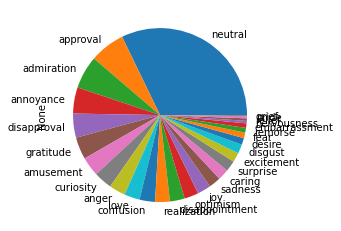

In [5]:
pie_data = pd.Series(emotions)
pie_data.value_counts().plot(kind="pie")

In [6]:
# 2.1. Vectorizer
vectorizer = CountVectorizer()

In [7]:
text_dataset = vectorizer.fit_transform(posts)

In [8]:
"""
each column in the feature vector refers to a word/token.
each row in the feature vector is a post.
if said post uses a word in the vectorizer's vocabulary exactly once, then it will be shown as a 1
in the corresponding index of the vectorizer's vocabulary.
therefore, adding up the column for each column will give you the frequency of each word
"""
def word_frequencies(dataset, vocabulary):
    #add up the elements in the column for each column
    frequency_array = dataset.sum(axis=0).tolist()[0]
    
    #add up the list of frequencies to get total size of words
    total_sum = np.asarray(frequency_array).sum()
    
    #get words from feature vector
    words = vocabulary.keys()
    
    #get corresponding indices for words in feature vector
    indices = vocabulary.values()
    
    #since indices is a list of indices for the words at a 1:1 index, then we just map the frequencies value to the index
    #in the indices list and we get a list of sums that map to words list 1:1
    frequencies = list(map(lambda index: frequency_array[index], indices))
    
    #then just zip words list and frequencies list as a dictionary
    return dict(zip(words, frequencies)), total_sum

frequencies, total_sum = word_frequencies(text_dataset, vectorizer.vocabulary_)

In [9]:
# 2.2 Splitting the dataset
training_set, test_set = train_test_split(json_file,train_size=0.8)

# training set
X_train = training_set[:, 0]
y_train = training_set[:, 1:]

# test set
X_test = test_set[:, 0]
y_test = test_set[:, 1:]

# 2.3.1 BASE MNB

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
X_train_mnb = vectorizer.fit_transform(X_train)

In [ ]:
mnb_cl = MultinomialNB()

In [ ]:
emotions = y_train[:,0]
sentiments = y_train[:,1]
mnb_emotions = mnb_cl.fit(X_train_mnb, emotions)

In [ ]:
score_base_mnb_emotions = mnb_emotions.score(X_train_mnb, emotions)
print("emotions score: ", score_base_mnb_emotions)

### Testing Base MNB Emotions

In [ ]:
X_test_base_mnb = vectorizer.transform(X_test)

In [ ]:
predicted_emotions = mnb_emotions.predict(X_test_base_mnb)
test_emotions = y_test[:,0]

## 2.4.1 MNB Base Report

### Report for emotions

In [ ]:
print(classification_report(test_emotions, predicted_emotions))

In [ ]:
emotions_cf_matrix = confusion_matrix(test_emotions, predicted_emotions)

In [ ]:
label_emotions=pd.Series(emotions).value_counts().keys().sort_values()
label_sentiments=pd.Series(sentiments).value_counts().keys().sort_values()

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(emotions_cf_matrix, xticklabels=label_emotions, yticklabels=label_emotions)
plt.show()

## Retrain for Testing Base MNB Sentiments

In [ ]:
mnb_sentiments = mnb_cl.fit(X_train_mnb, sentiments)
score_base_mnb_sentiments = mnb_sentiments.score(X_train_mnb, sentiments)
print("sentiments score: ", score_base_mnb_sentiments)

In [ ]:
predicted_sentiments = mnb_sentiments.predict(X_test_base_mnb)
test_sentiments = y_test[:,1]

### Report for sentiments

In [ ]:
print(classification_report(test_sentiments, predicted_sentiments))

In [ ]:
sentiments_cf_matrix = confusion_matrix(test_sentiments, predicted_sentiments)

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(sentiments_cf_matrix, xticklabels=label_sentiments, yticklabels=label_sentiments)
plt.show()

# 2.3.5 TOP DECISION TREE

In [10]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz

In [11]:
X_train_dt = vectorizer.fit_transform(X_train)

In [12]:
hyper_parameters = {'criterion':['gini', 'entropy'],'max_depth':[4,5], 'min_samples_split':[4,5,6]}

In [15]:
top_dt = GridSearchCV(tree.DecisionTreeClassifier(), hyper_parameters)

In [ ]:
emotions = y_train[:,0]
dt_emotions = top_dt.fit(X_train_dt, emotions)

In [ ]:
score_dt_emotions = top_dt.score(X_train_dt, emotions)
print("emotions score: ", score_dt_emotions)

In [ ]:
print(dt_emotions.best_params_)

## Testing Top Decision Tree Emotions

In [ ]:
X_test_dt = vectorizer.transform(X_test)

In [ ]:
predicted_emotions = dt_emotions.predict(X_test_dt)

In [ ]:
test_emotions = y_test[:,0]

## 2.4.5 Top Decision Tree Report

### Report for emotions

In [ ]:
print(classification_report(test_emotions, predicted_emotions))

In [ ]:
emotions_cf_matrix = confusion_matrix(test_emotions, predicted_emotions)

In [ ]:
import seaborn as sns
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(emotions_cf_matrix, xticklabels=label_emotions, yticklabels=label_emotions)
plt.show()

## Retrain for testing Top DT Sentiments

In [ ]:
sentiments = y_train[:,1]
dt_sentiments = top_dt.fit(X_train_dt, sentiments)

In [ ]:
score_dt_sentiments = top_dt.score(X_train_dt, sentiments)
print("sentiments score: ", score_dt_sentiments)

In [ ]:
print(dt_sentiments.best_params_)

In [ ]:
predicted_sentiments = dt_sentiments.predict(X_test_dt)
test_sentiments = y_test[:,1]

### Report for Sentiments

In [ ]:
print(classification_report(test_sentiments, predicted_sentiments))

In [ ]:
sentiments_cf_matrix = confusion_matrix(test_sentiments, predicted_sentiments)

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(sentiments_cf_matrix, xticklabels=label_sentiments, yticklabels=label_sentiments)
plt.show()

# 2.5 Removing Stop Words

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
vectorizer_stp_wrds = CountVectorizer(stop_words="english")

In [ ]:
mnb_cl = MultinomialNB()

In [ ]:
# 2.2 Splitting the dataset
training_set, test_set = train_test_split(json_file,train_size=0.8)

# training set
X_train = training_set[:, 0]
y_train = training_set[:, 1:]

# test set
X_test = test_set[:, 0]
y_test = test_set[:, 1:]

In [ ]:
X_train_mnb_stp_wrds = vectorizer_stp_wrds.fit_transform(X_train)

In [ ]:
emotions = y_train[:,0]
mnb_emotions_stp_wrds = mnb_cl.fit(X_train_mnb_stp_wrds, emotions)

In [ ]:
score_mnb_stp_wrds_emotions = mnb_cl.score(X_train_mnb_stp_wrds, emotions)
print("emotions score: ", score_mnb_stp_wrds_emotions)

## Testing MNB w/ Stop Words Emotions

In [ ]:
X_test_mnb_stp_wrds = vectorizer_stp_wrds.transform(X_test)

In [ ]:
predicted_emotions_stp_wrds = mnb_emotions_stp_wrds.predict(X_test_mnb_stp_wrds)
test_emotions_stp_wrds = y_test[:,0]

## Report for emotions

In [ ]:
print(classification_report(test_emotions_stp_wrds, predicted_emotions_stp_wrds))

In [ ]:
emotions_cf_matrix_stp_wrds = confusion_matrix(test_emotions_stp_wrds, predicted_emotions_stp_wrds)

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(emotions_cf_matrix_stp_wrds, xticklabels=label_emotions, yticklabels=label_emotions)
plt.show()

# Retrain for Test MNB w/ Stop Words Sentiments

In [ ]:
sentiments = y_train[:,1]
mnb_sentiments_stp_wrds = mnb_cl.fit(X_train_mnb_stp_wrds, sentiments)
score_mnb_stp_wrds_sentiments = mnb_cl.score(X_train_mnb_stp_wrds, sentiments)
print("sentiments score: ", score_mnb_stp_wrds_sentiments)

In [ ]:
predicted_sentiments_stp_wrds = mnb_sentiments_stp_wrds.predict(X_test_mnb_stp_wrds)
test_sentiments_stp_wrds = y_test[:,1]

## Report for sentiments

In [ ]:
print(classification_report(test_sentiments_stp_wrds, predicted_sentiments_stp_wrds))

In [ ]:
sentiments_cf_matrix_stp_wrds = confusion_matrix(test_sentiments_stp_wrds, predicted_sentiments_stp_wrds)

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(sentiments_cf_matrix_stp_wrds, xticklabels=label_sentiments, yticklabels=label_sentiments)
plt.show()

# Top-DT w/ Stop Words

In [ ]:
from sklearn import tree
from sklearn import preprocessing
from sklearn.tree import export_graphviz

In [ ]:
X_train_top_dt_stp_wrds = vectorizer_stp_wrds.fit_transform(X_train)

In [ ]:
hyper_parameters = {'criterion':['gini', 'entropy'],'max_depth':[4,5], 'min_samples_split':[4,5,6]}

In [ ]:
top_dt_stp_wrds = GridSearchCV(tree.DecisionTreeClassifier(), hyper_parameters, cv=3)

In [ ]:
dt_emotions_stp_wrds = top_dt_stp_wrds.fit(X_train_top_dt_stp_wrds, emotions)

In [ ]:
score_dt_emotions_stp_wrds = top_dt_stp_wrds.score(X_train_top_dt_stp_wrds, emotions)
print("emotions score: ", score_dt_emotions_stp_wrds)

## Testing Top DT w/ Stop Words Emotions

In [ ]:
X_test_dt_stp_words = vectorizer_stp_wrds.transform(X_test)

In [ ]:
predicted_emotions_stp_wrds_dt = dt_emotions_stp_wrds.predict(X_test_dt_stp_words)

In [ ]:
test_emotions_stp_wrds = y_test[:,0]

In [ ]:
print(dt_emotions_stp_wrds.best_params_)

## Top DT Emotions Report

In [ ]:
print(classification_report(test_emotions_stp_wrds, predicted_emotions_stp_wrds_dt))

In [ ]:
emotions_cf_matrix_stp_wrds = confusion_matrix(test_emotions_stp_wrds, predicted_emotions_stp_wrds_dt)

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(emotions_cf_matrix_stp_wrds, xticklabels=label_emotions, yticklabels=label_emotions)
plt.show()

## Retrain for Testing Top DT w/ Stop Words Sentiments

In [ ]:
dt_sentiments_stp_wrds = top_dt_stp_wrds.fit(X_train_top_dt_stp_wrds, sentiments)
score_dt_sentiments_stp_wrds = top_dt_stp_wrds.score(X_train_top_dt_stp_wrds, sentiments)
print("sentiments score: ", score_dt_sentiments_stp_wrds)

In [ ]:
predicted_sentiments_stp_wrds_dt = dt_sentiments_stp_wrds.predict(X_test_dt_stp_words)
test_sentiments_stp_wrds = y_test[:,1]
print(dt_sentiments_stp_wrds.best_params_)

## Top DT Sentiments Report

In [ ]:
print(classification_report(test_sentiments_stp_wrds, predicted_sentiments_stp_wrds_dt))

In [ ]:
sentiments_cf_matrix_stp_wrds = confusion_matrix(test_sentiments_stp_wrds, predicted_sentiments_stp_wrds_dt)

In [ ]:
plt.rcParams["figure.figsize"] = [10, 10]
plt.rcParams["figure.autolayout"] = True
sns.heatmap(sentiments_cf_matrix_stp_wrds, xticklabels=label_sentiments, yticklabels=label_sentiments)
plt.show()

# Part 3: Embeddings as Features

### 3.1

In [ ]:
import gensim.downloader as api

In [ ]:
w2v_model = api.load("word2vec-google-news-300")

### 3.2

In [ ]:
import nltk
nltk.download()

In [ ]:
word_tokens = [nltk.word_tokenize(corpus, language="english") for corpus in X_train]

In [ ]:
import pandas as pd
import itertools

In [ ]:
flattened_tokens = list(itertools.chain.from_iterable(word_tokens))
training_set_tokens=pd.Series(flattened_tokens).value_counts()
print(training_set_tokens)
print(training_set_tokens.sum(), "= total number of tokens in the training dataset")

### 3.3

In [ ]:
def get_post_embedding(model, post):
    tokens = nltk.word_tokenize(post)
    words = [word for word in tokens if word in model]
    if len(words)>0:
        return np.mean(w2v_model[words], axis=0)
    else:
        return []

In [ ]:
training_post_embeddings = [get_post_embedding(w2v_model, post) for post in X_train]

### 3.4

#### Training Hitrate

In [ ]:
valid_training_tokens=pd.Series({word:training_set_tokens[word] for word in training_set_tokens.keys() if word in w2v_model})

In [ ]:
print(valid_training_tokens)
print(valid_training_tokens.sum(), "= total number of valid tokens in the training dataset")

In [ ]:
training_hitrate = (valid_training_tokens.sum()/training_set_tokens.sum())*100

In [ ]:
print("{:.2f}% hitrate in the training dataset".format(training_hitrate))

#### Testing Hitrate

In [ ]:
testing_set_tokens = list(itertools.chain.from_iterable([nltk.word_tokenize(corpus, language="english") for corpus in X_test]))
testing_set_tokens = pd.Series(testing_set_tokens).value_counts()

In [ ]:
print(testing_set_tokens)
print(testing_set_tokens.sum(), "= total number of tokens in testing dataset")

In [ ]:
valid_testing_tokens=pd.Series({word:testing_set_tokens[word] for word in testing_set_tokens.keys() if word in w2v_model})

In [ ]:
print(valid_testing_tokens)
print(valid_testing_tokens.sum(), "= total number of valid tokens in the testing dataset")

In [ ]:
testing_hitrate = (valid_testing_tokens.sum()/testing_set_tokens.sum())*100

In [ ]:
print("{:.2f}% hitrate in the testing dataset".format(testing_hitrate))